In [10]:
#datasets from tensorflow
# loading essential libraries
import tensorflow as tf
# import sklearn
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [11]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [12]:
# checking shape and structure of data
X_train.shape

(50000, 32, 32, 3)

In [13]:

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

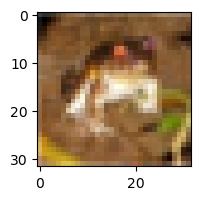

In [14]:
plt.figure(figsize = (10, 2))
plt.imshow(X_train[0])

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

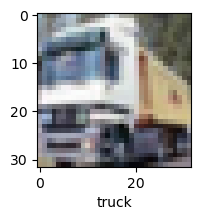

In [17]:
plot_sample(X_train, y_train, 1)

In [18]:
#normalizing the data into 0-->1 since the RGB values are in 0-255, we can divide it by 255
X_train = X_train / 255.0
X_test = X_test / 255.0

In [19]:
# building simple ANN for the image classification

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.8134 - accuracy: 0.3540
Epoch 2/5
1563/1563 [==============================] - 60s 39ms/step - loss: 1.6261 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.5435 - accuracy: 0.4558
Epoch 4/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4828 - accuracy: 0.4761
Epoch 5/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4366 - accuracy: 0.4936


In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.50      0.54      1000
           1       0.49      0.74      0.59      1000
           2       0.42      0.29      0.35      1000
           3       0.39      0.27      0.32      1000
           4       0.47      0.32      0.38      1000
           5       0.50      0.27      0.35      1000
           6       0.56      0.48      0.52      1000
           7       0.32      0.80      0.46      1000
           8       0.62      0.60      0.61      1000
           9       0.62      0.46      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [25]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 27s 16ms/step - loss: 1.4445 - accuracy: 0.4810
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0948 - accuracy: 0.6153
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9619 - accuracy: 0.6652
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8819 - accuracy: 0.6943
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8217 - accuracy: 0.7152
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7660 - accuracy: 0.7344
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7169 - accuracy: 0.7510
Epoch 8/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6750 - accuracy: 0.7643
Epoch 9/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6341 - accuracy: 0.7796
Epoch 10/10
1563/1563 [==============================] - 28s 18m

In [27]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9152 - accuracy: 0.7022


[0.9152258038520813, 0.7021999955177307]

In [61]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 11ms/step


array([[1.70863583e-03, 2.29213503e-04, 6.87269785e-04, 7.89375424e-01,
        3.03842081e-03, 1.81736499e-01, 3.32269887e-03, 3.81241116e-05,
        1.98041964e-02, 5.95589263e-05],
       [1.06238294e-04, 2.00381950e-02, 1.74433112e-07, 2.08239953e-07,
        5.58229507e-09, 9.67552261e-09, 1.26233479e-09, 6.96144866e-08,
        9.79835689e-01, 1.94459517e-05],
       [1.76294148e-02, 9.45535488e-03, 1.10265071e-04, 4.72132256e-03,
        1.70350817e-04, 3.28862137e-04, 6.14849923e-05, 2.31739410e-04,
        9.60403621e-01, 6.88749366e-03],
       [9.27644253e-01, 2.79198168e-03, 2.70676654e-04, 4.19859978e-04,
        1.73820867e-04, 3.44456203e-06, 2.62448284e-05, 1.38913865e-05,
        6.85357824e-02, 1.20096236e-04],
       [1.89913393e-04, 1.63479373e-04, 5.11360057e-02, 5.40408194e-02,
        2.92602181e-01, 1.22136213e-02, 5.87282777e-01, 2.91962875e-04,
        2.07631197e-03, 2.90767457e-06]], dtype=float32)

In [63]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [29]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [35]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

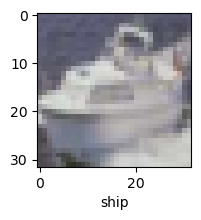

In [68]:
plot_sample(X_test, y_test,199)

In [69]:
classes[y_classes[199]]

'ship'